## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

Подгрузим датасеты

In [2]:
df_train = pd.read_csv("train_dataset_train.csv")
df_test = pd.read_csv("test_dataset_test.csv")

df_calls = pd.read_csv("Calls.csv")
df_connection_time = pd.read_csv("ConnectionTime.csv")
df_ed = pd.read_csv("Education.csv")
df_skud = pd.read_csv("SKUD.csv")
df_tasks = pd.read_csv("Tasks.csv")
df_tn = pd.read_csv("TimenNetwork.csv")
df_wd = pd.read_csv("WorkingDay.csv")

C:\Users\Lenin\AppData\Local\Temp\ipykernel_13156\830195044.py:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_connection_time = pd.read_csv("ConnectionTime.csv")
C:\Users\Lenin\AppData\Local\Temp\ipykernel_13156\830195044.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tasks = pd.read_csv("Tasks.csv")


## Рассмотрим датасет по ближе

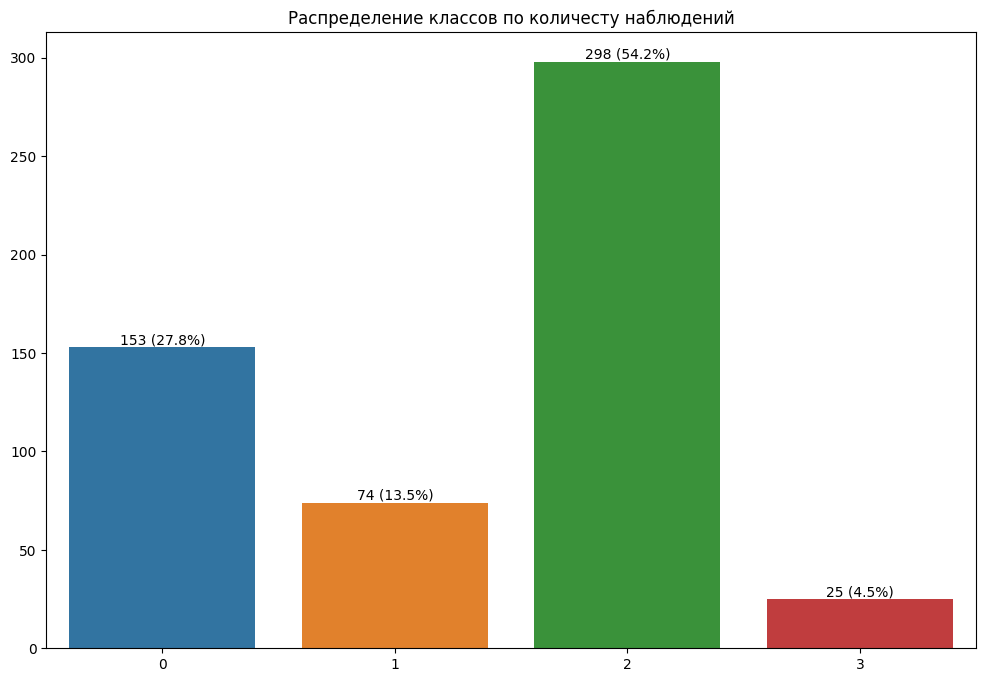

In [3]:
plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=df_train['type'])
df = pd.DataFrame(df_train['type'].value_counts())
df['Norm'] = df.type.map(lambda x: 100 * x / df.type.sum())
df['Sort'] = df.index
df = df.sort_values(by='Sort')
abs_values = df['type']
rel_values = df['Norm']
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.setp(ax, xlabel=None, ylabel=None, title='Распределение классов по количесту наблюдений')
plt.show()

In [4]:
df_calls.head(3)

,Date,CallTime,NumberOfCalls,Вид учета времени,InOut,id
0,"2021-08-16 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
1,"2021-09-21 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
2,"2021-01-11 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945


In [5]:
df_connection_time.head(3)

,dateNum,maxLogOff,Нормативное время начала раб.дня,Фактич. время начала раб.дня,Время опоздания,Признак опоздания,Вых/Будни,id
0,"2021-12-15 00:00:00,000","2021-12-15 17:30:27,246","1899-12-30 08:30:00,000","1899-12-30 08:24:18,606",NaN,NaN,Будни,ОРГ1-02782
1,"2021-12-15 00:00:00,000","2021-12-15 16:30:13,330","1899-12-30 08:30:00,000","1899-12-30 01:05:20,513",NaN,NaN,Будни,ОРГ1-01407
2,"2021-12-15 00:00:00,000","2021-12-15 15:27:37,246","1899-12-30 08:30:00,000","1899-12-30 05:47:33,156",NaN,NaN,Будни,ОРГ1-01909


In [6]:
df_ed.head(3)

,Табельный номер руководителя,id,Вид образования,Специальность
0,NaN,ОРГ1-00131,Высшее образование - бакалавриат,Юриспруденция
1,NaN,ОРГ1-03220,Среднее профессиональное образование,Финансы
2,NaN,ОРГ1-03008,Высшее образование,Юриспруденция


In [7]:
df_skud.head(3)

,Дата,Приход.1,Уход.1,Длительность общая,Длительность раб.дня без обеда,Вых/Будни,id
0,"2021-03-01 00:00:00,000","1899-12-30 08:11:00,000","1899-12-30 17:32:00,000","9,35","8,35",Будни,ОРГ1-00791
1,"2021-03-01 00:00:00,000","1899-12-30 08:25:00,000","1899-12-30 17:32:00,000","9,1166666666666671","8,1166666666666671",Будни,ОРГ1-01826
2,"2021-03-01 00:00:00,000","1899-12-30 08:31:00,000","1899-12-30 17:32:00,000","9,0166666666666657","8,0166666666666657",Будни,ОРГ1-00713


In [8]:
df_tasks.head(3)

,Статус по просрочке,Срок плановый,"Просрочено, дней",ДлительностьПросрочки,ID задачи,Вид документа,Дата старта задания,Дата завершения задания плановая,Дата завершения задания фактическая,Состояние задания,id
0,Без нарушения срока,NaN,0,без нарушения срока,E1DE844D-EE2D-4C41-AEDF-93F246749F0E,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
1,Без нарушения срока,NaN,0,без нарушения срока,7A92343C-8C9A-46E7-AC81-8F50F95009D0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
2,Без нарушения срока,NaN,0,без нарушения срока,5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588


In [9]:
df_tn.head(3)

,Вых/Будни,monitor_Time,startTime,id
0,Будни,300,"2021-08-16 00:00:00,000",ОРГ1-01402
1,Будни,300,"2021-08-18 00:00:00,000",ОРГ1-01402
2,Будни,300,"2021-08-19 00:00:00,000",ОРГ1-01402


In [10]:
df_wd.head(3)

,startTime,activeTime,Вых/Будни,monitorTime,id
0,"2021-11-30 00:00:00,000",2,Будни,2,ОРГ1-01553
1,"2021-11-30 00:00:00,000",2,Будни,2,ОРГ1-02112
2,"2021-11-30 00:00:00,000",2,Будни,2,ОРГ1-02112


In [11]:
df_train.head(3)

,id,type
0,ОРГ1-02050,2
1,ОРГ1-02783,2
2,ОРГ2-06173,0


In [12]:
df_test.head(3)

,id,type
0,ОРГ1-02649,0
1,ОРГ2-05929,0
2,ОРГ2-05859,0


Узнаем размерность наборов

In [13]:
print("df_train", df_train.shape)

print("df_calls", df_calls.shape)
print("df_connection_time", df_connection_time.shape)
print("df_ed", df_ed.shape)
print("df_skud", df_ed.shape)
print("df_tasks", df_ed.shape)
print("df_tn", df_ed.shape)
print("df_wd", df_ed.shape)

print("df_test", df_test.shape)

df_train (550, 2)
df_calls (407867, 6)
df_connection_time (230662, 8)
df_ed (5609, 4)
df_skud (5609, 4)
df_tasks (5609, 4)
df_tn (5609, 4)
df_wd (5609, 4)
df_test (262, 2)


### Видоизмение данных

### 1.df_ed

Обьединим два набора с данными

In [14]:
df_train = pd.merge(df_train, df_ed , on="id", how='left').drop_duplicates(subset="id")

df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность
0,ОРГ1-02050,2,NaN,Неполное высшее образование,Технологические машины и оборудование
2,ОРГ1-02783,2,ОРГ1-01974,Высшее образование,Автоматизация технологических процессов и прои...
3,ОРГ2-06173,0,ОРГ2-01170,Высшее образование,Управление качеством


In [15]:
df_train["Вид образования"] = df_train["Вид образования"].astype('category')
df_train["Вид образования"] = df_train["Вид образования"].cat.codes

df_train["Вид образования"].value_counts()

 0     297
-1      73
 10     64
 1      59
 2      30
 3       7
 6       7
 4       5
 9       3
 8       2
 5       2
 7       1
Name: Вид образования, dtype: int64

In [16]:
df_test = pd.merge(df_test, df_ed , on="id", how='left').drop_duplicates(subset="id")

### 2. df_connection_time

In [17]:
df_connection_time.head(3)

,dateNum,maxLogOff,Нормативное время начала раб.дня,Фактич. время начала раб.дня,Время опоздания,Признак опоздания,Вых/Будни,id
0,"2021-12-15 00:00:00,000","2021-12-15 17:30:27,246","1899-12-30 08:30:00,000","1899-12-30 08:24:18,606",NaN,NaN,Будни,ОРГ1-02782
1,"2021-12-15 00:00:00,000","2021-12-15 16:30:13,330","1899-12-30 08:30:00,000","1899-12-30 01:05:20,513",NaN,NaN,Будни,ОРГ1-01407
2,"2021-12-15 00:00:00,000","2021-12-15 15:27:37,246","1899-12-30 08:30:00,000","1899-12-30 05:47:33,156",NaN,NaN,Будни,ОРГ1-01909


посчитаем количество опозданий

In [18]:
df_connection_time_res = df_connection_time[["id","Признак опоздания"]]
df_connection_time_res = df_connection_time_res[df_connection_time_res["Признак опоздания"].notna()]

df_connection_time_res.head()

,id,Признак опоздания
127561,ОРГ1-01589,Опоздание
127562,ОРГ1-01589,Опоздание
127563,ОРГ1-01589,Опоздание
127564,ОРГ1-01589,Опоздание
127565,ОРГ1-01589,Опоздание


In [19]:
df_connection_time_res = df_connection_time_res.groupby("id").count()
df_connection_time_res = df_connection_time_res.rename(columns={"Признак опоздания": "Число опозданий"})

df_connection_time_res.head(3)

,Число опозданий
id,
ОРГ1-00004,275
ОРГ1-00028,35
ОРГ1-00030,57


In [20]:
df_train = pd.merge(df_train, df_connection_time_res , on="id", how='left')#.drop(["event_type"],axis =1)

df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Число опозданий
0,ОРГ1-02050,2,NaN,4,Технологические машины и оборудование,5.0
1,ОРГ1-02783,2,ОРГ1-01974,0,Автоматизация технологических процессов и прои...,7.0
2,ОРГ2-06173,0,ОРГ2-01170,0,Управление качеством,22.0


### 3.df_skud

In [21]:
df_skud.head(3)

,Дата,Приход.1,Уход.1,Длительность общая,Длительность раб.дня без обеда,Вых/Будни,id
0,"2021-03-01 00:00:00,000","1899-12-30 08:11:00,000","1899-12-30 17:32:00,000","9,35","8,35",Будни,ОРГ1-00791
1,"2021-03-01 00:00:00,000","1899-12-30 08:25:00,000","1899-12-30 17:32:00,000","9,1166666666666671","8,1166666666666671",Будни,ОРГ1-01826
2,"2021-03-01 00:00:00,000","1899-12-30 08:31:00,000","1899-12-30 17:32:00,000","9,0166666666666657","8,0166666666666657",Будни,ОРГ1-00713


In [22]:
def work_day(row):
    return float(row['Длительность общая'].replace(',', ''))
def work_day_lunch(row):
    return float(row['Длительность раб.дня без обеда'].replace(',', ''))

In [23]:
df_skud['Длительность общая'] = df_skud.apply(work_day, axis = 1)
df_skud['Длительность раб.дня без обеда'] = df_skud.apply(work_day_lunch, axis = 1)

In [24]:
df_skud_res = df_skud.groupby("id").sum()

In [25]:
df_skud_res = df_skud_res.rename(columns={"Длительность раб.дня без обеда": "Сум.длит-ть раб.дня"})

In [26]:
df_skud_res.head(3)

,Длительность общая,Сум.длит-ть раб.дня
id,,
ОРГ1-00002,1.564417e+18,2.258817e+18
ОРГ1-00004,1.604267e+18,1.698667e+18
ОРГ1-00005,7.745833e+17,1.558333e+18


### 4.df_tasks

In [27]:
df_tasks.head(3)

,Статус по просрочке,Срок плановый,"Просрочено, дней",ДлительностьПросрочки,ID задачи,Вид документа,Дата старта задания,Дата завершения задания плановая,Дата завершения задания фактическая,Состояние задания,id
0,Без нарушения срока,NaN,0,без нарушения срока,E1DE844D-EE2D-4C41-AEDF-93F246749F0E,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
1,Без нарушения срока,NaN,0,без нарушения срока,7A92343C-8C9A-46E7-AC81-8F50F95009D0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588
2,Без нарушения срока,NaN,0,без нарушения срока,5CE64E52-D2D1-4DCC-B2C8-34734AA39AC0,Служебная записка,"2021-12-10 00:00:00,000",NaN,"2021-12-10 00:00:00,000",Завершено,ОРГ1-02588


In [28]:
df_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536660 entries, 0 to 536659
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Статус по просрочке                  536660 non-null  object
 1   Срок плановый                        15821 non-null   object
 2   Просрочено, дней                     536660 non-null  int64 
 3   ДлительностьПросрочки                536660 non-null  object
 4   ID задачи                            536660 non-null  object
 5   Вид документа                        533143 non-null  object
 6   Дата старта задания                  536660 non-null  object
 7   Дата завершения задания плановая     274057 non-null  object
 8   Дата завершения задания фактическая  520683 non-null  object
 9   Состояние задания                    536660 non-null  object
 10  id                                   536660 non-null  object
dtypes: int64(1), object(10)
me

In [29]:
#df_tasks['Вид документа'] = df_tasks['Вид документа'].astype('str')

In [30]:
df_tasks['Вид документа'].unique()

array(['Служебная записка', 'Исходящий', 'Входящий',
       'Дополнительное соглашение', 'Договор', 'Внутренний документ',
       'Акт', 'Приказ', nan, 'Файл', 'Распоряжение', 'Протокол',
       'Запрос на внесение изменений', 'Отчет по ВА', 'Исходящий РМЗ',
       'Внутренний документ для БП синхронизация 1С'], dtype=object)

In [31]:
df_tasks = df_tasks.rename(columns={"Вид документа": "Вид_документа"})

In [32]:
df_tasks_doc = df_tasks.query('Вид_документа == "Служебная записка"').groupby("id")['Вид_документа'].count()

In [33]:
df_tasks_doc.head(3)

id
ОРГ1-00004    267
ОРГ1-00005    357
ОРГ1-00028      4
Name: Вид_документа, dtype: int64

In [34]:
df_train = pd.merge(df_train, df_tasks_doc, on="id", how='left')

### 5.df_calls

In [35]:
df_calls.head()

,Date,CallTime,NumberOfCalls,Вид учета времени,InOut,id
0,"2021-08-16 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
1,"2021-09-21 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
2,"2021-01-11 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
3,"2021-01-18 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945
4,"2021-01-27 00:00:00,000","0,00027777777777777778",1,Будни,ToUser,ОРГ1-01945


In [36]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407867 entries, 0 to 407866
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               407867 non-null  object
 1   CallTime           407867 non-null  object
 2   NumberOfCalls      407867 non-null  int64 
 3   Вид учета времени  392655 non-null  object
 4   InOut              407867 non-null  object
 5   id                 407867 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.7+ MB


In [37]:
df_calls = df_calls.rename(columns={"Вид учета времени": "Вид_учета_времени"})

<AxesSubplot: >

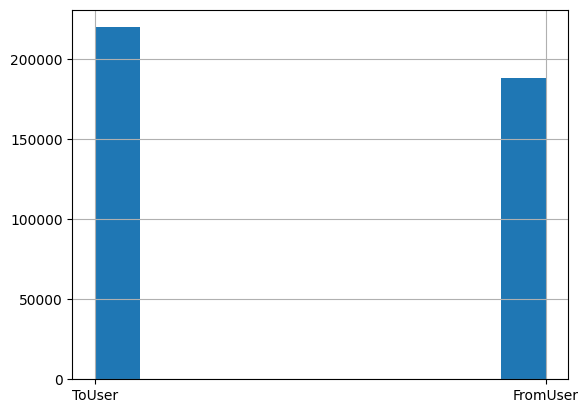

In [38]:
df_calls['InOut'].hist()

<AxesSubplot: >

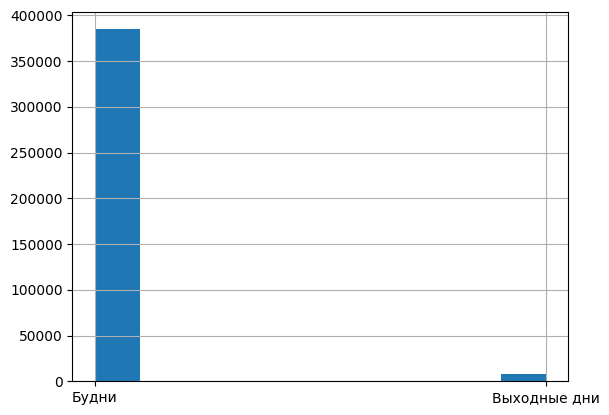

In [39]:
df_calls['Вид_учета_времени'].hist()

In [40]:
def call_dur(row):
    return float(row['CallTime'].replace(',', '.'))

In [41]:
df_calls['CallTime'] = df_calls.apply(call_dur, axis = 1)

посчитаем количество непринятых звонков от пользователей

In [42]:
df_calls_count = df_calls.query('InOut == "FromUser" & CallTime < 0.0003').groupby("id")['CallTime'].count()

In [43]:
df_calls_count

id
ОРГ1-00005    2
ОРГ1-00028    1
ОРГ1-00044    4
ОРГ1-00046    1
ОРГ1-00074    2
             ..
ОРГ2-04847    1
ОРГ2-04904    1
ОРГ2-05140    5
ОРГ2-05208    1
ОРГ2-06638    2
Name: CallTime, Length: 287, dtype: int64

In [44]:
df_train = pd.merge(df_train, df_calls_count, on="id", how='left')

In [45]:
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Число опозданий,Вид_документа,CallTime
0,ОРГ1-02050,2,NaN,4,Технологические машины и оборудование,5.0,NaN,NaN
1,ОРГ1-02783,2,ОРГ1-01974,0,Автоматизация технологических процессов и прои...,7.0,28.0,NaN
2,ОРГ2-06173,0,ОРГ2-01170,0,Управление качеством,22.0,NaN,NaN


### 6.df_wd

In [46]:
df_wd.sort_values('activeTime', ascending = False).head(5)

,startTime,activeTime,Вых/Будни,monitorTime,id
1924904,"2021-12-25 00:00:00,000",86343,Выходные дни,86466,ОРГ1-01185
1968074,"2021-10-31 00:00:00,000",86205,Выходные дни,86205,ОРГ1-02096
1906567,"2021-08-08 00:00:00,000",85639,Выходные дни,85639,ОРГ2-04135
1958425,"2021-12-12 00:00:00,000",84474,Выходные дни,84474,ОРГ1-01151
1969647,"2021-12-26 00:00:00,000",69518,Выходные дни,80137,ОРГ1-01185


In [47]:
df_wd_groupby = df_wd.groupby(['id', 'startTime'])[['activeTime']].sum()

In [48]:
df_wd_groupby

activeTime
id         startTime                          
ОРГ1-00004 2021-06-21 00:00:00,000       22859
           2021-06-22 00:00:00,000       15461
           2021-06-23 00:00:00,000       23349
           2021-06-24 00:00:00,000       13019
           2021-06-25 00:00:00,000       14982
...                                        ...
ОРГ2-08387 2021-12-24 00:00:00,000       25632
           2021-12-25 00:00:00,000       23265
           2021-12-26 00:00:00,000        7650
           2021-12-27 00:00:00,000       24212
           2021-12-28 00:00:00,000       19568

[186184 rows x 1 columns]

In [49]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971927 entries, 0 to 1971926
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   startTime    object
 1   activeTime   int64 
 2   Вых/Будни    object
 3   monitorTime  int64 
 4   id           object
dtypes: int64(2), object(3)
memory usage: 75.2+ MB


In [50]:
df_wd['startTime'].min()

'2021-06-20 00:00:00,000'

In [51]:
df_wd['startTime'].max()

'2021-12-31 00:00:00,000'

In [52]:
df_wd['noactive'] = df_wd['monitorTime'] - df_wd['activeTime']

In [53]:
df_wd['monitorTime'].unique()

array([    2,     4,     3, ..., 69648, 50311, 49726], dtype=int64)

In [54]:
df_wd = df_wd.rename(columns={"Вых/Будни": "Вых_Будни"})

In [55]:
df_wd['Вых_Будни'].value_counts()

Будни           1863858
Выходные дни     108069
Name: Вых_Будни, dtype: int64

In [56]:
df_active_week = df_wd.groupby("id")['noactive'].sum()

In [57]:
df_active_week

id
ОРГ1-00004     8426814
ОРГ1-00028    12273490
ОРГ1-00030      834779
ОРГ1-00044     1483906
ОРГ1-00046     3137284
                ...   
ОРГ2-06144     1584452
ОРГ2-06145    13009713
ОРГ2-06373      454020
ОРГ2-08025       96380
ОРГ2-08387     1148951
Name: noactive, Length: 1495, dtype: int64

In [58]:
#df_train = pd.merge(df_train, df_active_week, on="id", how='left')

### 7.df_tn

In [59]:
df_tn.head()

,Вых/Будни,monitor_Time,startTime,id
0,Будни,300,"2021-08-16 00:00:00,000",ОРГ1-01402
1,Будни,300,"2021-08-18 00:00:00,000",ОРГ1-01402
2,Будни,300,"2021-08-19 00:00:00,000",ОРГ1-01402
3,Будни,300,"2021-08-23 00:00:00,000",ОРГ1-01402
4,Будни,300,"2021-08-26 00:00:00,000",ОРГ1-01402


In [60]:
df_tn['monitor_Time'].unique()

array([  300,   600,   900, ..., 10831, 86122, 57610], dtype=int64)

In [61]:
df_monitor_Time = df_tn.groupby("id")['monitor_Time'].sum()

In [62]:
df_monitor_count = df_tn.groupby("id")['monitor_Time'].count()

In [63]:
df_monitor_Time = pd.merge(df_monitor_Time, df_monitor_count, on="id", how='left')

In [64]:
df_monitor_Time['monitor_Time_mean'] = df_monitor_Time['monitor_Time_x']/df_monitor_Time['monitor_Time_y']

In [65]:
df_monitor_Time = df_monitor_Time.drop(["monitor_Time_x", "monitor_Time_y"], axis = 1)

In [66]:
df_monitor_Time

,monitor_Time_mean
id,
ОРГ1-00004,10627.206215
ОРГ1-00028,20771.086331
ОРГ1-00030,21570.447653
ОРГ1-00044,21542.796178
ОРГ1-00046,10703.554307
...,...
ОРГ2-06144,14256.735484
ОРГ2-06145,9071.208211
ОРГ2-06373,14226.767296


In [67]:
#df_train = pd.merge(df_train, df_monitor_Time, on="id", how='left')

In [68]:
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Число опозданий,Вид_документа,CallTime
0,ОРГ1-02050,2,NaN,4,Технологические машины и оборудование,5.0,NaN,NaN
1,ОРГ1-02783,2,ОРГ1-01974,0,Автоматизация технологических процессов и прои...,7.0,28.0,NaN
2,ОРГ2-06173,0,ОРГ2-01170,0,Управление качеством,22.0,NaN,NaN


In [69]:
def str_id1(row):
    return str(row['id'])[-1]

In [70]:
df_train['id_1'] = df_train.apply(str_id1, axis = 1)

In [71]:
def str_id2(row):
    return str(row['id'])[-2]

In [72]:
df_train['id_2'] = df_train.apply(str_id2, axis = 1)

In [73]:
def str_id3(row):
    return str(row['id'])[-3]

In [74]:
#df_train['id_3'] = df_train.apply(str_id3, axis = 1)

In [75]:
def str_id4(row):
    return str(row['id'])[-4]

In [76]:
#df_train['id_4'] = df_train.apply(str_id4, axis = 1)

In [77]:
df_train['id_43'] =  df_train.apply(str_id4, axis = 1) + df_train.apply(str_id3, axis = 1)

In [78]:
df_train['id_43'] = df_train['id_43'].astype('str')

In [79]:
df_train['id_21'] =  df_train.apply(str_id2, axis = 1) + df_train.apply(str_id1, axis = 1)

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            550 non-null    object 
 1   type                          550 non-null    int64  
 2   Табельный номер руководителя  277 non-null    object 
 3   Вид образования               550 non-null    int8   
 4   Специальность                 462 non-null    object 
 5   Число опозданий               491 non-null    float64
 6   Вид_документа                 344 non-null    float64
 7   CallTime                      90 non-null     float64
 8   id_1                          550 non-null    object 
 9   id_2                          550 non-null    object 
 10  id_43                         550 non-null    object 
 11  id_21                         550 non-null    object 
dtypes: float64(3), int64(1), int8(1), object(7)
memory usage: 52.1+ 

In [81]:
df_train.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Число опозданий,Вид_документа,CallTime,id_1,id_2,id_43,id_21
0,ОРГ1-02050,2,NaN,4,Технологические машины и оборудование,5.0,NaN,NaN,0,5,20,50
1,ОРГ1-02783,2,ОРГ1-01974,0,Автоматизация технологических процессов и прои...,7.0,28.0,NaN,3,8,27,83
2,ОРГ2-06173,0,ОРГ2-01170,0,Управление качеством,22.0,NaN,NaN,3,7,61,73


Заменим пропуски на нули

In [82]:
df_train = df_train.fillna(0)

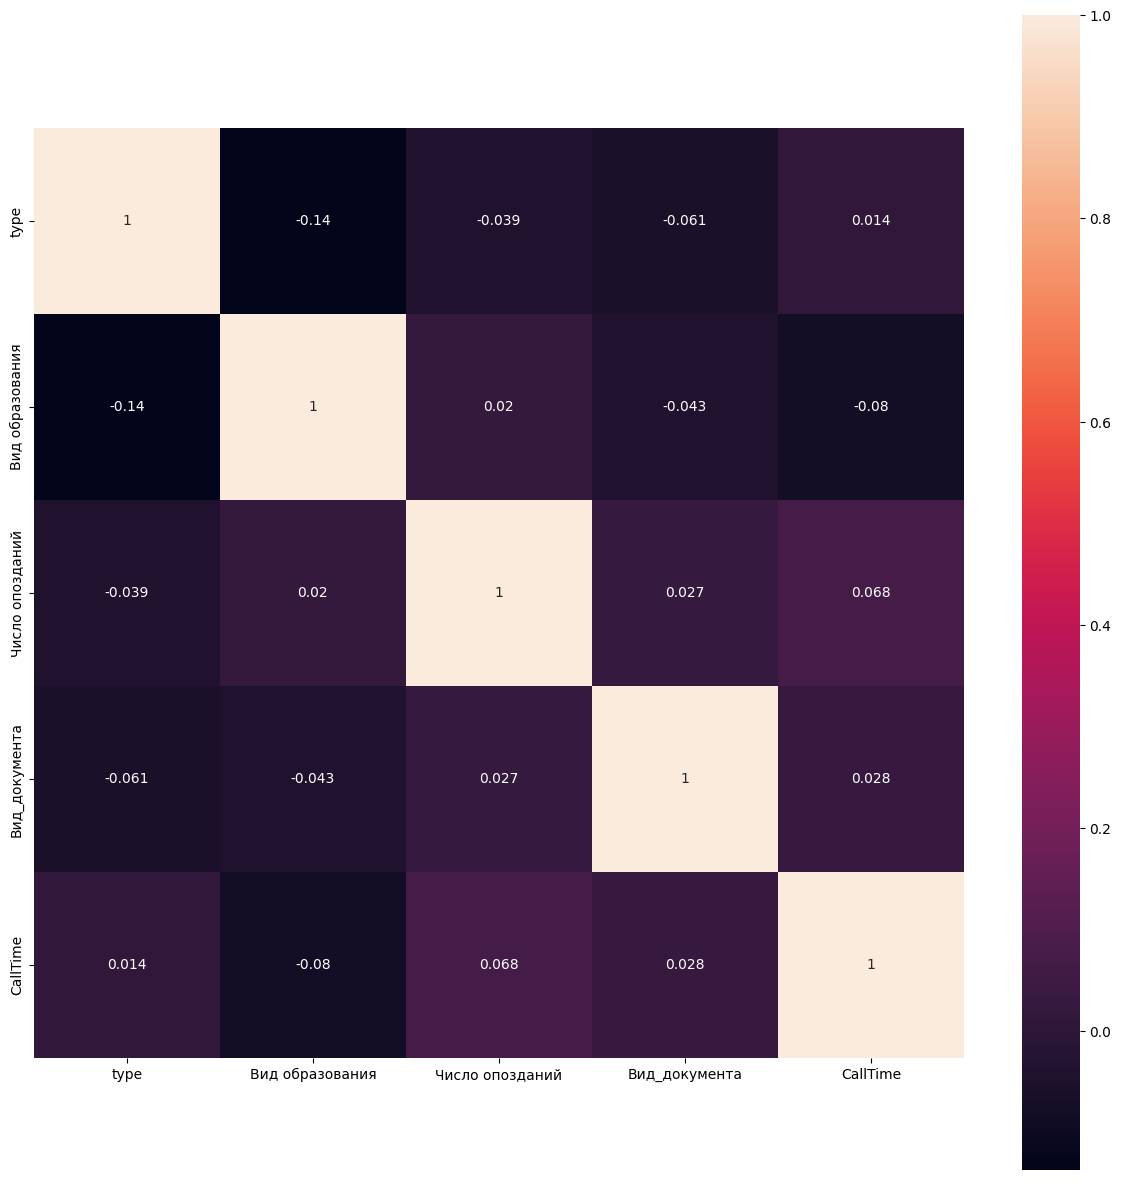

In [83]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [84]:
X = df_train.drop(["id", "type"], axis = 1)
y = df_train[["type"]]

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Табельный номер руководителя  550 non-null    object 
 1   Вид образования               550 non-null    int8   
 2   Специальность                 550 non-null    object 
 3   Число опозданий               550 non-null    float64
 4   Вид_документа                 550 non-null    float64
 5   CallTime                      550 non-null    float64
 6   id_1                          550 non-null    object 
 7   id_2                          550 non-null    object 
 8   id_43                         550 non-null    object 
 9   id_21                         550 non-null    object 
dtypes: float64(3), int8(1), object(6)
memory usage: 43.5+ KB


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [87]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify = y_test)

## Обучение модели

In [88]:
cat_features = X.dtypes[df_train.dtypes == "object"].index.values
cat_features

array(['Табельный номер руководителя', 'Специальность', 'id_1', 'id_2',
       'id_43', 'id_21'], dtype=object)

In [89]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=1100, verbose = 100)
clf.fit(X_train, y_train, cat_features = cat_features, eval_set=(X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.101832
0:	learn: 1.3292755	test: 1.3351798	best: 1.3351798 (0)	total: 157ms	remaining: 2m 52s
100:	learn: 0.5514757	test: 1.0520785	best: 1.0515685 (98)	total: 6.07s	remaining: 1m
200:	learn: 0.3112325	test: 1.0740142	best: 1.0515685 (98)	total: 11.8s	remaining: 52.7s
300:	learn: 0.2030230	test: 1.1181426	best: 1.0515685 (98)	total: 17.4s	remaining: 46.3s
400:	learn: 0.1460185	test: 1.1574982	best: 1.0515685 (98)	total: 23.3s	remaining: 40.6s
500:	learn: 0.1098949	test: 1.1761066	best: 1.0515685 (98)	total: 30s	remaining: 35.9s
600:	learn: 0.0865587	test: 1.1978943	best: 1.0515685 (98)	total: 36.4s	remaining: 30.2s
700:	learn: 0.0702895	test: 1.2213592	best: 1.0515685 (98)	total: 42.8s	remaining: 24.4s
800:	learn: 0.0582048	test: 1.2438072	best: 1.0515685 (98)	total: 48.8s	remaining: 18.2s
900:	learn: 0.0496470	test: 1.2622588	best: 1.0515685 (98)	total: 54.7s	remaining: 12.1s
1000:	learn: 0.0428166	test: 1.2813566	best: 1.0515685 (98)	total: 1m	remaining: 5.97s


In [90]:
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Табельный номер руководителя,22.845212
1,id_1,20.887463
2,id_2,15.512749
3,id_43,15.000985
4,id_21,9.484692
5,Число опозданий,6.934993
6,Вид образования,4.586066
7,Вид_документа,4.517328
8,CallTime,0.230512
9,Специальность,0.000000


## Оценка точности

In [91]:
pred = clf.predict(X_test)

In [92]:
y_test.head(3)

,type
48,2
30,2
305,0


In [93]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_test, pred, average='macro'))

Recall score: 0.4224972191323693


## Создание файла с ответом

In [157]:
df_test = pd.read_csv("test_dataset_test.csv")

In [158]:
df_test = pd.merge(df_test, df_ed , on="id", how='left').drop_duplicates(subset="id")

df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность
0,ОРГ1-02649,0,NaN,NaN,NaN
1,ОРГ2-05929,0,ОРГ2-00539,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...
2,ОРГ2-05859,0,ОРГ2-04561,Среднее общее образование,NaN


In [159]:
df_test["Вид образования"] = df_test["Вид образования"].astype('category')
df_test["Вид образования"] = df_test["Вид образования"].cat.codes

In [160]:
df_test = pd.merge(df_test, df_skud_res , on="id", how='left').drop(["Длительность общая"],axis =1)

In [161]:
#df_test['Число опозданий'] = df_test['Число опозданий'].astype('float64')

In [162]:
df_test = pd.merge(df_test, df_tasks_doc, on="id", how='left')

In [163]:
df_test = pd.merge(df_test, df_calls_count, on="id", how='left')

In [164]:
df_test['id_1'] = df_test.apply(str_id1, axis = 1)

In [165]:
df_test['id_2'] = df_test.apply(str_id2, axis = 1)

In [166]:
df_test['id_21'] =  df_test.apply(str_id2, axis = 1) + df_test.apply(str_id1, axis = 1)

In [167]:
df_test['id_43'] =  df_test.apply(str_id4, axis = 1) + df_test.apply(str_id3, axis = 1)

In [168]:
df_test['id_43'] = df_test['id_43'].astype('str')

In [169]:
df_test = pd.merge(df_test, df_connection_time_res , on="id", how='left')#.drop(["event_type"],axis =1)

df_test.head(3)

,id,type,Табельный номер руководителя,Вид образования,Специальность,Сум.длит-ть раб.дня,Вид_документа,CallTime,id_1,id_2,id_21,id_43,Число опозданий
0,ОРГ1-02649,0,NaN,-1,NaN,1.335583e+18,NaN,NaN,9,4,49,26,NaN
1,ОРГ2-05929,0,ОРГ2-00539,1,Инженерно-геодезическое обеспечение и техничес...,NaN,NaN,NaN,9,2,29,59,19.0
2,ОРГ2-05859,0,ОРГ2-04561,8,NaN,NaN,19.0,NaN,9,5,59,58,104.0


In [170]:
df_test = df_test.fillna(0)

In [171]:
df_test.head()

,id,type,Табельный номер руководителя,Вид образования,Специальность,Сум.длит-ть раб.дня,Вид_документа,CallTime,id_1,id_2,id_21,id_43,Число опозданий
0,ОРГ1-02649,0,0,-1,0,1.335583e+18,0.0,0.0,9,4,49,26,0.0
1,ОРГ2-05929,0,ОРГ2-00539,1,Инженерно-геодезическое обеспечение и техничес...,0.000000e+00,0.0,0.0,9,2,29,59,19.0
2,ОРГ2-05859,0,ОРГ2-04561,8,0,0.000000e+00,19.0,0.0,9,5,59,58,104.0
3,ОРГ1-00279,0,ОРГ1-00483,0,Промышленное и гражданское строительство,1.058767e+18,181.0,3.0,9,7,79,02,15.0
4,ОРГ2-01613,0,ОРГ2-02458,2,Промышленное и гражданское строительство,0.000000e+00,0.0,0.0,3,1,13,16,17.0


In [172]:
#df_test["Категория_спецтальности"] = df_test["Категория_спецтальности"].astype('category')
#df_test["Категория_спецтальности"] = df_test["Категория_спецтальности"].cat.codes

In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            262 non-null    object 
 1   type                          262 non-null    int64  
 2   Табельный номер руководителя  262 non-null    object 
 3   Вид образования               262 non-null    int8   
 4   Специальность                 262 non-null    object 
 5   Сум.длит-ть раб.дня           262 non-null    float64
 6   Вид_документа                 262 non-null    float64
 7   CallTime                      262 non-null    float64
 8   id_1                          262 non-null    object 
 9   id_2                          262 non-null    object 
 10  id_21                         262 non-null    object 
 11  id_43                         262 non-null    object 
 12  Число опозданий               262 non-null    float64
dtypes: fl

In [174]:
df_test = df_test.drop(["type", "id"], axis = 1)

In [175]:
pred = clf.predict(df_test)

In [176]:
df_test = pd.read_csv("test_dataset_test.csv")

In [177]:
df_test['type'] = pred

In [178]:
df_test.set_index('id', inplace = True)

In [179]:
df_test.to_csv("sample_submission1.csv")